# World Bank Data Preparation for Machine Learning

This notebook prepares the World Bank country data for machine learning models to predict time-to-development. It includes:
- Data exploration and quality assessment
- Feature engineering and selection
- Handling missing values
- Creating train/test splits for both cross-sectional and panel data approaches

## Import Libraries

Import necessary libraries for data manipulation, visualization, and file handling.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import os
warnings.filterwarnings('ignore')

## Define Data Paths

Set up paths to raw data, processed data, and machine learning data directories.

In [2]:
raw_data_path = os.path.join("..", "data", "raw_data")
processed_data_path = os.path.join("..", "data", "processed_data")
ml_data_path = os.path.join("..", "data", "ML_data")

## Quick Data Quality Check

Load and examine descriptive statistics of the South Asia dataset to understand data characteristics.

In [4]:
south = pd.read_csv('../data/raw_data/south_asia/1432078e-21c3-42bc-a731-8b635a48420f_Data.csv')
print(south.describe())

       Country Name Country Code  \
count          7582         7580   
unique            7            5   
top      Bangladesh          BGD   
freq           1516         1516   

                                              Series Name     Series Code  \
count                                                7580            7580   
unique                                               1516            1516   
top     Access to clean fuels and technologies for coo...  EG.CFT.ACCS.ZS   
freq                                                    5               5   

       1960 [YR1960] 1961 [YR1961] 1962 [YR1962] 1963 [YR1963] 1964 [YR1964]  \
count           7580          7580          7580          7580          7580   
unique           851          1035          1045          1066          1070   
top               ..            ..            ..            ..            ..   
freq            6678          6502          6492          6467          6463   

       1965 [YR1965]  ... 2015 [

## Load Merged Dataset

Load the previously merged and transformed country dataset from the processed data directory.

In [10]:
df = pd.read_csv(os.path.join(processed_data_path, "countries_merged_dataset.csv"))

## Dataset Overview

Display basic information about the dataset structure, including shape, column names, data types, and sample rows.

In [11]:
# Basic shape and column info
print("Shape:", df.shape)
print("\nColumns (first 40):")
print(df.columns[:40])

print("\nData types and non-null counts:")
print(df.info())

print("\nSample rows:")
display(df.head(5))

Shape: (6240, 1519)

Columns (first 40):
Index(['Country Code', 'Country Name', 'Year',
       'ARI treatment (% of children under 5 taken to a health provider)',
       'Access to clean fuels and technologies for cooking (% of population)',
       'Access to clean fuels and technologies for cooking, rural (% of rural population)',
       'Access to clean fuels and technologies for cooking, urban (% of urban population)',
       'Access to electricity (% of population)',
       'Access to electricity, rural (% of rural population)',
       'Access to electricity, urban (% of urban population)',
       'Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)',
       'Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)',
       'Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)',
       'Account ow

,Country Code,Country Name,Year,ARI treatment (% of children under 5 taken to a health provider),Access to clean fuels and technologies for cooking (% of population),"Access to clean fuels and technologies for cooking, rural (% of rural population)","Access to clean fuels and technologies for cooking, urban (% of urban population)",Access to electricity (% of population),"Access to electricity, rural (% of rural population)","Access to electricity, urban (% of urban population)",...,Women who believe a husband is justified in beating his wife (any of five reasons) (%),Women who believe a husband is justified in beating his wife when she argues with him (%),Women who believe a husband is justified in beating his wife when she burns the food (%),Women who believe a husband is justified in beating his wife when she goes out without telling him (%),Women who believe a husband is justified in beating his wife when she neglects the children (%),Women who believe a husband is justified in beating his wife when she refuses sex with him (%),Women who were first married by age 15 (% of women ages 20-24),Women who were first married by age 18 (% of women ages 20-24),Women's share of population ages 15+ living with HIV (%),Young people (ages 15-24) newly infected with HIV
0,AGO,Angola,1960,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
1,AGO,Angola,1961,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
2,AGO,Angola,1962,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
3,AGO,Angola,1963,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..
4,AGO,Angola,1964,..,..,..,..,..,..,..,...,..,..,..,..,..,..,..,..,..,..


In [12]:
print(df.describe())

              Year  Age dependency ratio (% of working-age population)  \
count  6240.000000                                        6240.000000    
mean   1992.000000                                          65.302616    
std      18.763167                                          19.784828    
min    1960.000000                                          17.302757    
25%    1976.000000                                          50.089134    
50%    1992.000000                                          58.231931    
75%    2008.000000                                          82.621503    
max    2024.000000                                         117.992556    

       Age dependency ratio, old (% of working-age population)  \
count                                        6240.000000         
mean                                           13.541946         
std                                             9.054094         
min                                             1.011724         
25%

## Visualize Data Distributions

Create comprehensive visualizations of the dataset:
1. Top 20 features by mean value (excluding near-zero values)
2. Top 20 features by standard deviation (showing variability)
3. Distribution of first 5 numeric features using violin plots
4. Summary statistics including missing data analysis

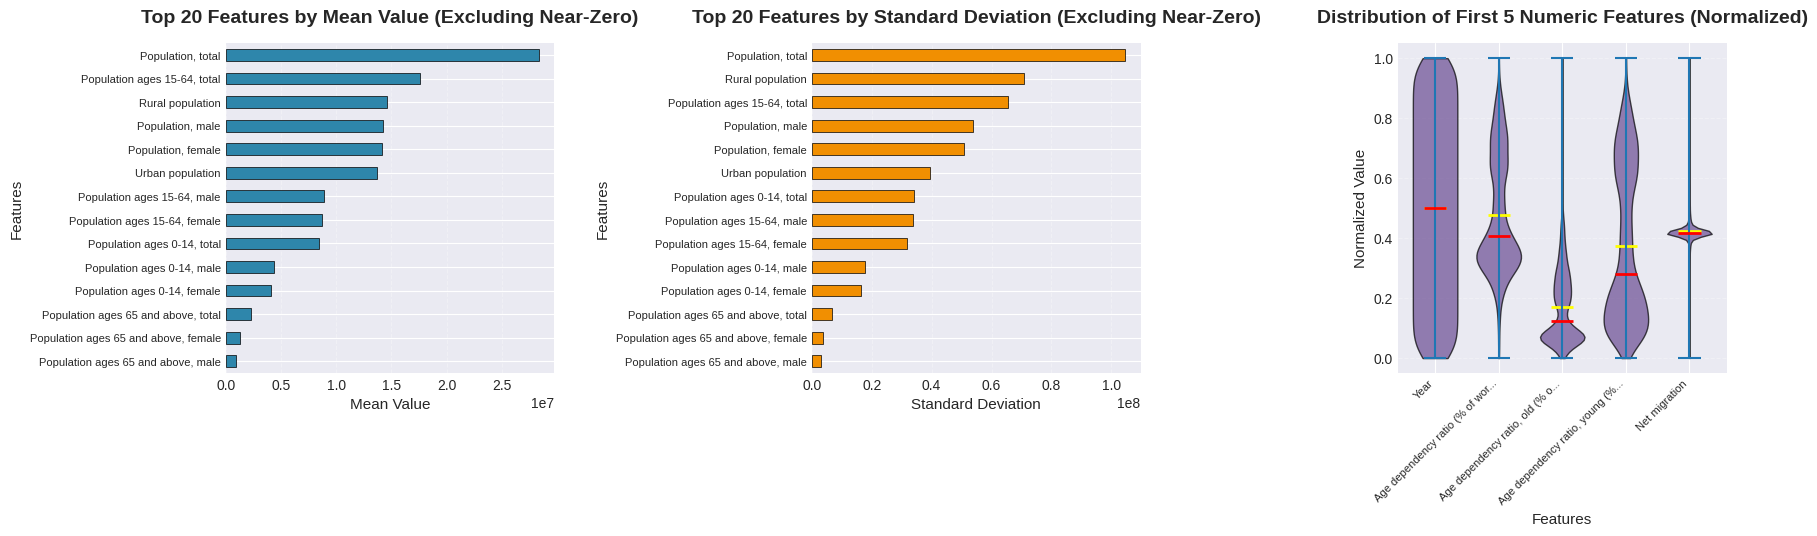


Dimensions: 6,240 rows x 1,519 columns
Numeric columns: 66
Non-numeric columns: 1,453

Missing Data Analysis:
  - Complete columns: 1,519 (100.0%)
  - Complete columns: 1,519 (100.0%)
  - Columns with >50% missing: 0
  - Columns with >50% missing: 0
  - Columns with >75% missing: 0
  - Overall missingness: 0.00%
  - Columns with >75% missing: 0
  - Overall missingness: 0.00%


In [13]:
# Visualize descriptive statistics with improved styling
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
plt.style.use('seaborn-v0_8-darkgrid')

# Get numeric columns for visualization
numeric_df = df.select_dtypes(include=['number'])
stats = numeric_df.describe()

# 1. Distribution of means across features - improved (filter out near-zero values)
ax1 = axes[0]
means = stats.loc['mean'].dropna().sort_values(ascending=False)
# Filter out values that are very close to zero (< 1% of the max value)
threshold_mean = means.max() * 0.01
means_filtered = means[means > threshold_mean].head(20)
bars1 = means_filtered.plot(kind='barh', ax=ax1, color='#2E86AB', edgecolor='black', linewidth=0.5)
ax1.set_title('Top 20 Features by Mean Value (Excluding Near-Zero)', fontsize=14, fontweight='bold', pad=15)
ax1.set_xlabel('Mean Value', fontsize=11)
ax1.set_ylabel('Features', fontsize=11)
ax1.grid(axis='x', alpha=0.3, linestyle='--')
ax1.invert_yaxis()
ax1.tick_params(axis='y', labelsize=8)

# 2. Distribution of standard deviations (variability) - improved (filter out near-zero values)
ax2 = axes[1]
stds = stats.loc['std'].dropna().sort_values(ascending=False)
# Filter out values that are very close to zero (< 1% of the max value)
threshold_std = stds.max() * 0.01
stds_filtered = stds[stds > threshold_std].head(20)
bars2 = stds_filtered.plot(kind='barh', ax=ax2, color='#F18F01', edgecolor='black', linewidth=0.5)
ax2.set_title('Top 20 Features by Standard Deviation (Excluding Near-Zero)', fontsize=14, fontweight='bold', pad=15)
ax2.set_xlabel('Standard Deviation', fontsize=11)
ax2.set_ylabel('Features', fontsize=11)
ax2.grid(axis='x', alpha=0.3, linestyle='--')
ax2.invert_yaxis()
ax2.tick_params(axis='y', labelsize=8)

# 3. Distribution of first 5 numeric features - improved with violin plot
ax3 = axes[2]
sample_cols = numeric_df.columns[:5].tolist()
if len(sample_cols) > 0:
    # Normalize for visualization since scales differ
    normalized = (numeric_df[sample_cols] - numeric_df[sample_cols].min()) / \
                 (numeric_df[sample_cols].max() - numeric_df[sample_cols].min())
    
    # Create violin plot with better styling
    parts = ax3.violinplot([normalized[col].dropna() for col in sample_cols], 
                           positions=range(len(sample_cols)),
                           showmeans=True, showmedians=True, widths=0.7)
    
    # Color the violin plots
    for pc in parts['bodies']:
        pc.set_facecolor('#6A4C93')
        pc.set_alpha(0.7)
        pc.set_edgecolor('black')
        pc.set_linewidth(1)
    
    # Style the median and mean lines
    parts['cmedians'].set_color('red')
    parts['cmedians'].set_linewidth(2)
    parts['cmeans'].set_color('yellow')
    parts['cmeans'].set_linewidth(2)
    
    ax3.set_title('Distribution of First 5 Numeric Features (Normalized)', 
                  fontsize=14, fontweight='bold', pad=15)
    ax3.set_ylabel('Normalized Value', fontsize=11)
    ax3.set_xlabel('Features', fontsize=11)
    ax3.set_xticks(range(len(sample_cols)))
    ax3.set_xticklabels([col[:30] + '...' if len(col) > 30 else col 
                         for col in sample_cols], rotation=45, ha='right', fontsize=8)
    ax3.grid(axis='y', alpha=0.3, linestyle='--')
    ax3.set_ylim(-0.05, 1.05)

plt.tight_layout(pad=3.0)
plt.show()

# Print enhanced summary statistics
print(f"\nDimensions: {len(df):,} rows x {len(df.columns):,} columns")
print(f"Numeric columns: {len(numeric_df.columns):,}")
print(f"Non-numeric columns: {len(df.columns) - len(numeric_df.columns):,}")
print(f"\nMissing Data Analysis:")
print(f"  - Complete columns: {(df.isna().sum() == 0).sum():,} ({(df.isna().sum() == 0).sum() / len(df.columns) * 100:.1f}%)")
print(f"  - Columns with >50% missing: {(df.isna().sum() / len(df) > 0.5).sum():,}")
print(f"  - Columns with >75% missing: {(df.isna().sum() / len(df) > 0.75).sum():,}")
print(f"  - Overall missingness: {df.isna().sum().sum() / (len(df) * len(df.columns)) * 100:.2f}%")


## Identify Key Columns

Find GDP per capita and income-related columns that will be used as indicators for development status.

In [4]:
# 1) Find GDP per capita–related columns
gdp_cols = [c for c in df.columns if "GDP per capita" in c]
print("Possible GDP per capita columns:")
for c in gdp_cols:
    print(" -", c)

# 2) Find income-group–related columns (if any)
income_cols = [c for c in df.columns if "income" in c.lower() or "Income" in c]
print("\nPossible income / income group columns:")
for c in income_cols:
    print(" -", c)

# 3) Show a small sample with these columns
cols_to_show = ['Country Name', 'Year'] + gdp_cols[:2] + income_cols[:2]  # limit so it prints nicely
print("\nSample of candidate columns:")
display(df[cols_to_show].head(10))


NameError: name 'df' is not defined

## Validate GDP Data

Convert GDP per capita to numeric format and verify data quality by:
- Checking sample data for a specific country (Angola)
- Counting non-missing GDP entries per country

In [15]:
gdp_col = "GDP per capita (current US$)" 

# 2) Convert GDP per capita to numeric (coerce ".." or other text to NaN)
df[gdp_col] = pd.to_numeric(df[gdp_col], errors="coerce")

# 3) Quick sanity check for one example country (Angola)
angola_gdp = (
    df[df["Country Name"] == "Angola"]
    .loc[:, ["Country Name", "Year", gdp_col]]
    .sort_values("Year")
    .head(15)
)
print("Sample GDP per capita series (Angola, first 15 years):")
print(angola_gdp)

# 4) How many non-missing GDP entries per country?
gdp_counts = (
    df.groupby("Country Name")[gdp_col]
      .apply(lambda x: x.notna().sum())
      .sort_values()
)
print("\nNon-missing GDP per capita counts per country:")
print(gdp_counts)

Sample GDP per capita series (Angola, first 15 years):
   Country Name  Year  GDP per capita (current US$)
0        Angola  1960                           NaN
1        Angola  1961                           NaN
2        Angola  1962                           NaN
3        Angola  1963                           NaN
4        Angola  1964                           NaN
5        Angola  1965                           NaN
6        Angola  1966                           NaN
7        Angola  1967                           NaN
8        Angola  1968                           NaN
9        Angola  1969                           NaN
10       Angola  1970                           NaN
11       Angola  1971                           NaN
12       Angola  1972                           NaN
13       Angola  1973                           NaN
14       Angola  1974                           NaN

Non-missing GDP per capita counts per country:
Country Name
Gibraltar            0
Channel Islands     25
San Ma

## Analyze Country Coverage Over Time

Examine how many countries have data available for each year to determine:
- Data coverage trends over time
- Suitable baseline years for analysis (with at least 60, 75, or 90 countries)

In [16]:
# Country coverage per year
coverage = (
    df.groupby("Year")["Country Name"]
      .nunique()
      .reset_index(name="num_countries")
      .sort_values("Year")
)

print("First 20 years of coverage:")
print(coverage.head(20))

print("\nLast 20 years of coverage:")
print(coverage.tail(20))

# Now find candidate baseline years for different strictness levels
print("\nFirst year with >= 60 countries:")
print(coverage[coverage["num_countries"] >= 60].head(1))

print("\nFirst year with >= 75 countries:")
print(coverage[coverage["num_countries"] >= 75].head(1))

print("\nFirst year with >= 90 countries:")
print(coverage[coverage["num_countries"] >= 90].head(1))

First 20 years of coverage:
    Year  num_countries
0   1960             96
1   1961             96
2   1962             96
3   1963             96
4   1964             96
5   1965             96
6   1966             96
7   1967             96
8   1968             96
9   1969             96
10  1970             96
11  1971             96
12  1972             96
13  1973             96
14  1974             96
15  1975             96
16  1976             96
17  1977             96
18  1978             96
19  1979             96

Last 20 years of coverage:
    Year  num_countries
45  2005             96
46  2006             96
47  2007             96
48  2008             96
49  2009             96
50  2010             96
51  2011             96
52  2012             96
53  2013             96
54  2014             96
55  2015             96
56  2016             96
57  2017             96
58  2018             96
59  2019             96
60  2020             96
61  2021             96
62  2022

## Define Development Threshold and Calculate Target Variable

Using the World Bank 2024 high-income threshold ($13,935 GNI per capita):
1. Identify the first year each country reached high-income status
2. Calculate years from baseline (1960) to development
3. Identify countries that haven't yet reached the threshold

In [17]:
gdp_col = "GDP per capita (current US$)"

# World Bank 2024 high-income threshold (GNI, we approximate with GDP per capita)
high_income_threshold = 13935.0

# 1) For each country: first year its GDP per capita reaches/exceeds threshold
developed_info = (
    df[df[gdp_col] >= high_income_threshold]
    .groupby("Country Name")
    .agg(developed_year=("Year", "min"))
    .sort_values("developed_year")
)

# 2) Global baseline year
baseline_year = 1960
developed_info["baseline_year"] = baseline_year

# 3) Years it took to become "developed"
developed_info["years_to_developed"] = (
    developed_info["developed_year"] - developed_info["baseline_year"]
)

print("Sample of countries that reached high-income threshold:")
print(developed_info.head(15))

print("\nHow many countries reached the threshold?")
print(len(developed_info))

# 4) Countries that have NOT yet reached the threshold by 2024
all_countries = set(df["Country Name"].unique())
developed_countries = set(developed_info.index)
never_developed = sorted(all_countries - developed_countries)

print("\nCountries that never reached the threshold (1960–2024):")
print(never_developed)


Sample of countries that reached high-income threshold:
                      developed_year  baseline_year  years_to_developed
Country Name                                                           
Monaco                          1972           1960                  12
United Arab Emirates            1974           1960                  14
Qatar                           1976           1960                  16
Saudi Arabia                    1977           1960                  17
Switzerland                     1978           1960                  18
Liechtenstein                   1978           1960                  18
Sweden                          1979           1960                  19
Luxembourg                      1979           1960                  19
Kuwait                          1979           1960                  19
Norway                          1980           1960                  20
Iceland                         1980           1960                  20
United S

## Assess Baseline Year Data Quality

Filter data to baseline year (1960) and analyze:
- Number of countries with data at baseline
- Fraction of missing values per column
- Features with most and least missing data

In [18]:
baseline_year = 1960
gdp_col = "GDP per capita (current US$)"

# 1) Keep only the baseline year
df_base = df[df["Year"] == baseline_year].copy()

print("Shape at baseline year:", df_base.shape)
print("Countries at baseline year:", df_base["Country Name"].nunique())

# 2) Fraction of non-missing values per column at baseline year
nonnull_frac_base = df_base.notna().mean().sort_values()

print("\nColumns with the MOST missing values at baseline (lowest non-null fraction):")
print(nonnull_frac_base.head(20))

print("\nColumns with the LEAST missing values at baseline (highest non-null fraction):")
print(nonnull_frac_base.tail(20))

Shape at baseline year: (96, 1519)
Countries at baseline year: 96

Columns with the MOST missing values at baseline (lowest non-null fraction):
GDP per capita (current US$)                                                             0.5625
Country Code                                                                             1.0000
Out-of-pocket expenditure per capita (current US$)                                       1.0000
Out-of-pocket expenditure (% of current health expenditure)                              1.0000
Other taxes (current LCU)                                                                1.0000
Other taxes (% of revenue)                                                               1.0000
Other people in need of international protection by country or territory of origin       1.0000
Other people in need of international protection by country or territory of asylum       1.0000
Other manufacturing (% of value added in manufacturing)                                 

## Create Cross-Sectional Dataset

Build a cross-sectional dataset with one row per country at baseline year (1960):
1. Ensure one row per country
2. Attach the target variable (years_to_developed)
3. Split into developed countries (with known target) and not-yet-developed countries

In [19]:
baseline_year = 1960
gdp_col = "GDP per capita (current US$)"

# 1) Baseline slice: one row per country at baseline_year
df_base = df[df["Year"] == baseline_year].copy()

print("Baseline shape:", df_base.shape)
print("Unique countries at baseline:", df_base["Country Name"].nunique())

# 2) Keep only one row per country (in case duplicates exist)
df_base = df_base.sort_values(["Country Name"]).drop_duplicates(subset=["Country Name"])
print("After enforcing 1 row per country:", df_base.shape)

# 3) Attach the target years_to_developed from developed_info
# (developed_info already has index = Country Name and column years_to_developed)
df_base = df_base.merge(
    developed_info[["years_to_developed"]],
    left_on="Country Name",
    right_index=True,
    how="left"   # countries that never developed will have NaN here
)

print("\nColumns in df_base now (first 10):")
print(df_base.columns[:10])

print("\nHow many countries have a known years_to_developed?")
print(df_base["years_to_developed"].notna().sum())

print("How many do NOT (still not high-income by 2024)?")
print(df_base["years_to_developed"].isna().sum())

Baseline shape: (96, 1519)
Unique countries at baseline: 96
After enforcing 1 row per country: (96, 1519)

Columns in df_base now (first 10):
Index(['Country Code', 'Country Name', 'Year',
       'ARI treatment (% of children under 5 taken to a health provider)',
       'Access to clean fuels and technologies for cooking (% of population)',
       'Access to clean fuels and technologies for cooking, rural (% of rural population)',
       'Access to clean fuels and technologies for cooking, urban (% of urban population)',
       'Access to electricity (% of population)',
       'Access to electricity, rural (% of rural population)',
       'Access to electricity, urban (% of urban population)'],
      dtype='object')

How many countries have a known years_to_developed?
56
How many do NOT (still not high-income by 2024)?
40


## Define Feature and Target Columns

Separate the dataset into:
- ID columns (Country Code, Country Name, Year)
- Target variable (years_to_developed)
- Feature columns (all other variables)
- Train set (countries that developed) vs Predict set (countries still developing)

In [20]:
# 1) Define ID and target columns
id_cols = ["Country Code", "Country Name", "Year"]
target_col = "years_to_developed"

# 2) Candidate feature columns = everything except IDs + target
feature_cols = [
    c for c in df_base.columns
    if c not in id_cols + [target_col]
]

print("Total columns:", len(df_base.columns))
print("Number of feature columns:", len(feature_cols))

# 3) Split into train (developed) vs predict (not yet developed)
train_mask = df_base[target_col].notna()

df_train = df_base[train_mask].copy()
df_predict = df_base[~train_mask].copy()

print("\nTrain set shape:", df_train.shape)
print("Predict set shape:", df_predict.shape)

print("\nExample feature columns (first 15):")
print(feature_cols[:15])

Total columns: 1520
Number of feature columns: 1516

Train set shape: (56, 1520)
Predict set shape: (40, 1520)

Example feature columns (first 15):
['ARI treatment (% of children under 5 taken to a health provider)', 'Access to clean fuels and technologies for cooking (% of population)', 'Access to clean fuels and technologies for cooking, rural (% of rural population)', 'Access to clean fuels and technologies for cooking, urban (% of urban population)', 'Access to electricity (% of population)', 'Access to electricity, rural (% of rural population)', 'Access to electricity, urban (% of urban population)', 'Account ownership at a financial institution or with a mobile-money-service provider (% of population ages 15+)', 'Account ownership at a financial institution or with a mobile-money-service provider, female (% of population ages 15+)', 'Account ownership at a financial institution or with a mobile-money-service provider, male (% of population ages 15+)', 'Account ownership at a fin

## Feature Selection Based on Missing Values

Filter features based on data completeness:
1. Calculate non-null fraction for each feature in the training set
2. Keep only features with ≥80% non-missing values
3. Create cleaned feature matrices for train and predict sets

In [21]:
id_cols = ["Country Code", "Country Name", "Year"]
target_col = "years_to_developed"

# 1) Recompute feature_cols to be safe
feature_cols = [
    c for c in df_base.columns
    if c not in id_cols + [target_col]
]

# 2) Train / predict split (already did logically, but we do it here again explicitly)
train_mask = df_base[target_col].notna()
df_train = df_base[train_mask].copy()
df_predict = df_base[~train_mask].copy()

print("Train shape:", df_train.shape)
print("Predict shape:", df_predict.shape)

# 3) Non-null fraction per feature **in the TRAIN set**
nonnull_frac_train = df_train[feature_cols].notna().mean().sort_values()

print("\nFeatures with MOST missing values in TRAIN (lowest non-null fraction):")
print(nonnull_frac_train.head(20))

print("\nFeatures with LEAST missing values in TRAIN (highest non-null fraction):")
print(nonnull_frac_train.tail(20))

# 4) Choose a threshold: keep only features with >= 0.8 non-null in TRAIN
min_nonnull = 0.8
good_features = nonnull_frac_train[nonnull_frac_train >= min_nonnull].index.tolist()

print(f"\nTotal candidate features: {len(feature_cols)}")
print(f"Features kept with >= {min_nonnull*100:.0f}% non-missing in TRAIN: {len(good_features)}")

# 5) Create cleaned train/predict feature matrices
X_train = df_train[good_features].copy()
y_train = df_train[target_col].copy()

X_predict = df_predict[good_features].copy()   # same columns so model can be applied later

print("\nX_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_predict shape:", X_predict.shape)

Train shape: (56, 1520)
Predict shape: (40, 1520)

Features with MOST missing values in TRAIN (lowest non-null fraction):
GDP per capita (current US$)                                                             0.535714
Out-of-pocket expenditure per capita, PPP (current international $)                      1.000000
Out-of-pocket expenditure per capita (current US$)                                       1.000000
Out-of-pocket expenditure (% of current health expenditure)                              1.000000
Other taxes (current LCU)                                                                1.000000
Other taxes (% of revenue)                                                               1.000000
Other people in need of international protection by country or territory of origin       1.000000
Other people in need of international protection by country or territory of asylum       1.000000
Other manufacturing (% of value added in manufacturing)                                  1.000

## Convert to Numeric and Impute Missing Values

Data cleaning steps:
1. Convert all features to numeric format (non-numeric values → NaN)
2. Compute median values for each feature using training data only
3. Fill missing values with these medians
4. Verify no NaN values remain

In [22]:
print("X_train dtypes before numeric conversion:")
print(X_train.dtypes.head(10))

# 1) Convert all features to numeric (anything weird -> NaN)
X_train_num = X_train.apply(pd.to_numeric, errors="coerce")
X_predict_num = X_predict.apply(pd.to_numeric, errors="coerce")

print("\nFraction of missing values per feature in X_train after numeric conversion (top 10):")
print(X_train_num.isna().mean().sort_values(ascending=False).head(10))

# 2) Compute median per feature on TRAIN ONLY
feature_medians = X_train_num.median(axis=0)

# 3) Fill NaNs using these medians
X_train_filled = X_train_num.fillna(feature_medians)
X_predict_filled = X_predict_num.fillna(feature_medians)

# 4) Sanity checks
print("\nAny NaNs left in X_train_filled?", X_train_filled.isna().sum().sum())
print("Any NaNs left in X_predict_filled?", X_predict_filled.isna().sum().sum())

print("\nFinal shapes:")
print("X_train_filled:", X_train_filled.shape)
print("y_train:", y_train.shape)
print("X_predict_filled:", X_predict_filled.shape)


X_train dtypes before numeric conversion:
Out-of-pocket expenditure per capita, PPP (current international $)                   object
Out-of-pocket expenditure per capita (current US$)                                    object
Out-of-pocket expenditure (% of current health expenditure)                           object
Other taxes (current LCU)                                                             object
Other taxes (% of revenue)                                                            object
Other people in need of international protection by country or territory of origin    object
Other people in need of international protection by country or territory of asylum    object
Other manufacturing (% of value added in manufacturing)                               object
Other expense (current LCU)                                                           object
Over-age students, primary (% of enrollment)                                          object
dtype: object

Fraction of m

## Remove All-NaN Features

Identify and remove features that are entirely missing (all NaN) in the training set:
1. Find columns with 100% missing values
2. Drop them from both train and predict sets
3. Recompute medians and re-impute on cleaned feature set

In [23]:
# 1) Identify features that are entirely NaN in TRAIN
all_nan_cols = X_train_num.columns[X_train_num.isna().all(axis=0)]
print("Number of features that are all-NaN in TRAIN:", len(all_nan_cols))
print("Example all-NaN columns:", list(all_nan_cols[:10]))

# 2) Drop those from both train & predict
X_train_num2 = X_train_num.drop(columns=all_nan_cols)
X_predict_num2 = X_predict_num.drop(columns=all_nan_cols)

print("\nShapes after dropping all-NaN features:")
print("X_train_num2:", X_train_num2.shape)
print("X_predict_num2:", X_predict_num2.shape)

# 3) Recompute medians on the cleaned TRAIN
feature_medians2 = X_train_num2.median(axis=0)

# 4) Fill NaNs with these medians
X_train_filled2 = X_train_num2.fillna(feature_medians2)
X_predict_filled2 = X_predict_num2.fillna(feature_medians2)

# 5) Final sanity check
print("\nAny NaNs left in X_train_filled2?", X_train_filled2.isna().sum().sum())
print("Any NaNs left in X_predict_filled2?", X_predict_filled2.isna().sum().sum())

Number of features that are all-NaN in TRAIN: 1162
Example all-NaN columns: ['Out-of-pocket expenditure per capita, PPP (current international $)', 'Out-of-pocket expenditure per capita (current US$)', 'Out-of-pocket expenditure (% of current health expenditure)', 'Other taxes (current LCU)', 'Other taxes (% of revenue)', 'Other people in need of international protection by country or territory of origin', 'Other people in need of international protection by country or territory of asylum', 'Other manufacturing (% of value added in manufacturing)', 'Other expense (current LCU)', 'Over-age students, primary (% of enrollment)']

Shapes after dropping all-NaN features:
X_train_num2: (56, 353)
X_predict_num2: (40, 353)

Any NaNs left in X_train_filled2? 0
Any NaNs left in X_predict_filled2? 0

Any NaNs left in X_train_filled2? 0
Any NaNs left in X_predict_filled2? 0


## Extract Country Identifiers

Create separate dataframes with Country Code and Country Name for both train and predict sets to maintain traceability.

In [24]:
# Train IDs
train_ids = df_train[["Country Code", "Country Name"]].reset_index(drop=True)

# Predict IDs
predict_ids = df_predict[["Country Code", "Country Name"]].reset_index(drop=True)

print(train_ids.head())
print(predict_ids.head())

  Country Code Country Name
0          AND      Andorra
1          AUS    Australia
2          AUT      Austria
3          BHR      Bahrain
4          BEL      Belgium
  Country Code Country Name
0          AGO       Angola
1          BGD   Bangladesh
2          BEN        Benin
3          BTN       Bhutan
4          BOL      Bolivia


## Identify Potential Data Leakage Features

Search for features that contain income or GDP information that could leak the target variable:
- GDP per capita variants
- GNI (Gross National Income) measures
- Income classification indicators

In [25]:
# We work from the cleaned numeric feature matrix
all_feature_cols = X_train_num2.columns.tolist()

# 1) Heuristic: find columns whose name clearly involves income / GDP / GNI
income_keywords = [
    "gdp", 
    "gross national income", 
    "gni", 
    "per capita income", 
    "income per capita",
    "atlas method", 
    "high income", 
    "upper middle", 
    "lower middle"
]

leak_like_cols = [
    c for c in all_feature_cols
    if any(kw in c.lower() for kw in income_keywords)
]

print(f"Potential income/GDP-related columns (possible leakage): {len(leak_like_cols)}")
for c in leak_like_cols:
    print(" -", c)

Potential income/GDP-related columns (possible leakage): 46
 - Merchandise trade (% of GDP)
 - Monetary Sector credit to private sector (% GDP)
 - Military expenditure (% of GDP)
 - Manufacturing, value added (% of GDP)
 - Net ODA received (% of GNI)
 - Net ODA provided, total (% of GNI)
 - Net ODA provided to the least developed countries (% of GNI)
 - Services, value added (% of GDP)
 - Trade in services (% of GDP)
 - Trade (% of GDP)
 - Claims on central government, etc. (% GDP)
 - Domestic credit to private sector by banks (% of GDP)
 - Domestic credit to private sector (% of GDP)
 - Domestic credit provided by financial sector (% of GDP)
 - Discrepancy in expenditure estimate of GDP (current LCU)
 - Discrepancy in expenditure estimate of GDP (constant LCU)
 - Current account balance (% of GDP)
 - Agriculture, forestry, and fishing, value added (% of GDP)
 - Broad money (% of GDP)
 - Households and NPISHs final consumption expenditure (% of GDP)
 - Imports of goods and services (% 

## Remove Data Leakage Features

Drop features that directly contain GDP per capita or GNI per capita values to prevent data leakage:
1. Identify hard-leakage columns
2. Remove from both train and predict sets
3. Recompute medians and impute on final clean feature set

In [26]:
# Start from numeric-cleaned matrices (before median filling)
# X_train_num2, X_predict_num2

hard_leak_cols = [
    c for c in X_train_num2.columns
    if any(kw in c.lower() for kw in [
        "gni per capita",
        "gdp per capita",
        "gni (",
        "gdp ("
    ])
]

print("Hard-leakage columns to drop:", len(hard_leak_cols))
for c in hard_leak_cols:
    print(" -", c)

# 1) Drop from both train and predict
X_train_num3 = X_train_num2.drop(columns=hard_leak_cols)
X_predict_num3 = X_predict_num2.drop(columns=hard_leak_cols)

print("\nShapes after dropping hard leakage:")
print("X_train_num3:", X_train_num3.shape)
print("X_predict_num3:", X_predict_num3.shape)

# 2) Recompute medians on TRAIN only
feature_medians3 = X_train_num3.median(axis=0)

# 3) Fill NaNs
X_train_final = X_train_num3.fillna(feature_medians3)
X_predict_final = X_predict_num3.fillna(feature_medians3)

print("\nAny NaNs left in X_train_final?", X_train_final.isna().sum().sum())
print("Any NaNs left in X_predict_final?", X_predict_final.isna().sum().sum())

Hard-leakage columns to drop: 16
 - Discrepancy in expenditure estimate of GDP (current LCU)
 - Discrepancy in expenditure estimate of GDP (constant LCU)
 - GNI per capita (current LCU)
 - GNI per capita (constant LCU)
 - GNI per capita (constant 2015 US$)
 - GNI (current US$)
 - GNI (current LCU)
 - GNI (constant LCU)
 - GNI (constant 2015 US$)
 - GDP per capita (current LCU)
 - GDP per capita (constant LCU)
 - GDP per capita (constant 2015 US$)
 - GDP (current US$)
 - GDP (current LCU)
 - GDP (constant LCU)
 - GDP (constant 2015 US$)

Shapes after dropping hard leakage:
X_train_num3: (56, 337)
X_predict_num3: (40, 337)

Any NaNs left in X_train_final? 0
Any NaNs left in X_predict_final? 0

Any NaNs left in X_train_final? 0
Any NaNs left in X_predict_final? 0


## Export Cross-Sectional Datasets

Save the final cross-sectional (baseline year) datasets:
- `train_years_to_developed_final.csv`: Countries that developed (with target variable)
- `predict_countries_features_final.csv`: Countries still developing (without target)

In [27]:
# IDs for mapping
train_ids = df_train[["Country Code", "Country Name"]].reset_index(drop=True)
predict_ids = df_predict[["Country Code", "Country Name"]].reset_index(drop=True)

# Final train export = IDs + features + target
train_final = pd.concat(
    [train_ids, X_train_final.reset_index(drop=True), y_train.reset_index(drop=True)],
    axis=1
)

# Final predict export = IDs + features (no target)
predict_final = pd.concat(
    [predict_ids, X_predict_final.reset_index(drop=True)],
    axis=1
)

train_final.to_csv("train_years_to_developed_final.csv", index=False)
predict_final.to_csv("predict_countries_features_final.csv", index=False)

print("Saved:")
print(" - train_years_to_developed_final.csv  (56 ×", train_final.shape[1], ")")
print(" - predict_countries_features_final.csv (40 ×", predict_final.shape[1], ")")

Saved:
 - train_years_to_developed_final.csv  (56 × 340 )
 - predict_countries_features_final.csv (40 × 339 )


## Create Panel Dataset Structure

Build a panel (longitudinal) dataset with multiple years per country:
1. Merge development year into all time periods
2. Calculate years_to_developed for each (country, year) pair
3. Label rows where country hasn't developed yet
4. Rows after development or for never-developed countries remain unlabeled

In [28]:
import numpy as np

gdp_col = "GDP per capita (current US$)"
baseline_year = 1960  # still the first observation year

# developed_info: index = Country Name, column = developed_year
# (you already built this earlier)

# 1) Merge developed_year into the full df (all years)
df_panel = df.merge(
    developed_info[["developed_year"]],
    left_on="Country Name",
    right_index=True,
    how="left"
)

print("Shape of df_panel:", df_panel.shape)

# 2) Define years_to_developed_from_t for each (country, year)
df_panel["years_to_developed"] = np.where(
    df_panel["developed_year"].notna() & (df_panel["Year"] <= df_panel["developed_year"]),
    df_panel["developed_year"] - df_panel["Year"],
    np.nan,
)

# 3) Check how many labeled vs unlabeled rows we now have
num_labeled = df_panel["years_to_developed"].notna().sum()
num_unlabeled = df_panel["years_to_developed"].isna().sum()

print("Total rows:", len(df_panel))
print("Labeled rows (countries & years before high-income):", num_labeled)
print("Unlabeled rows (never-developed OR years after developing):", num_unlabeled)

# 4) Quick peek
print("\nSample labeled rows:")
print(
    df_panel[
        df_panel["years_to_developed"].notna()
    ][["Country Name", "Year", "developed_year", "years_to_developed"]]
    .head(20)
)

Shape of df_panel: (6240, 1520)
Total rows: 6240
Labeled rows (countries & years before high-income): 1882
Unlabeled rows (never-developed OR years after developing): 4358

Sample labeled rows:
   Country Name  Year  developed_year  years_to_developed
65      Andorra  1960          1988.0                28.0
66      Andorra  1961          1988.0                27.0
67      Andorra  1962          1988.0                26.0
68      Andorra  1963          1988.0                25.0
69      Andorra  1964          1988.0                24.0
70      Andorra  1965          1988.0                23.0
71      Andorra  1966          1988.0                22.0
72      Andorra  1967          1988.0                21.0
73      Andorra  1968          1988.0                20.0
74      Andorra  1969          1988.0                19.0
75      Andorra  1970          1988.0                18.0
76      Andorra  1971          1988.0                17.0
77      Andorra  1972          1988.0               

## Prepare Panel Dataset for Modeling

Split panel data into train (labeled) and predict (unlabeled) sets:
1. Define feature columns (excluding IDs, target, and future-leaking variables)
2. Analyze missingness patterns in labeled rows
3. Identify features with sufficient data quality

In [29]:
# 1) Labeled (train) vs unlabeled (predict) in panel form
train_panel = df_panel[df_panel["years_to_developed"].notna()].copy()
predict_panel = df_panel[df_panel["years_to_developed"].isna()].copy()

print("Train panel shape:", train_panel.shape)
print("Predict panel shape:", predict_panel.shape)

# 2) Define candidate features for the PANEL dataset
id_cols_panel = ["Country Code", "Country Name"]
target_col = "years_to_developed"
leak_future_cols = ["developed_year"]  # this reveals the future, so we won't use it as a feature

feature_cols_panel = [
    c for c in df_panel.columns
    if c not in id_cols_panel + [target_col] + leak_future_cols
]

print("\nNumber of candidate feature columns (panel):", len(feature_cols_panel))

# 3) Missingness per feature among LABELED rows only
nonnull_frac_panel = (
    train_panel[feature_cols_panel]
    .notna()
    .mean()
    .sort_values()
)

print("\nFeatures with MOST missing values in TRAIN PANEL (lowest non-null fraction):")
print(nonnull_frac_panel.head(20))

print("\nFeatures with LEAST missing values in TRAIN PANEL (highest non-null fraction):")
print(nonnull_frac_panel.tail(20))

Train panel shape: (1882, 1521)
Predict panel shape: (4358, 1521)

Number of candidate feature columns (panel): 1517

Features with MOST missing values in TRAIN PANEL (lowest non-null fraction):
GDP per capita (current US$)                                                             0.714665
Year                                                                                     1.000000
Out-of-pocket expenditure per capita (current US$)                                       1.000000
Out-of-pocket expenditure (% of current health expenditure)                              1.000000
Other taxes (current LCU)                                                                1.000000
Other taxes (% of revenue)                                                               1.000000
Other people in need of international protection by country or territory of origin       1.000000
Other people in need of international protection by country or territory of asylum       1.000000
Other manufacturing (

## Panel Feature Selection

Apply missingness threshold to panel features:
1. Keep only features with ≥50% non-missing values in training data
2. Build feature matrices for panel train and predict sets
3. Display retained features

In [30]:
# 1) Choose missingness threshold for panel features
min_nonnull_panel = 0.5

good_features_panel = nonnull_frac_panel[nonnull_frac_panel >= min_nonnull_panel].index.tolist()

print(f"Total candidate features (panel): {len(feature_cols_panel)}")
print(f"Features kept with >= {min_nonnull_panel*100:.0f}% non-missing in TRAIN PANEL: {len(good_features_panel)}")

# 2) Build raw X/y matrices (still unclean types, some may be object)
X_train_panel_raw = train_panel[good_features_panel].copy()
y_train_panel = train_panel["years_to_developed"].copy()

X_predict_panel_raw = predict_panel[good_features_panel].copy()

print("\nShapes:")
print("X_train_panel_raw:", X_train_panel_raw.shape)
print("y_train_panel:", y_train_panel.shape)
print("X_predict_panel_raw:", X_predict_panel_raw.shape)

print("\nExample of kept features (first 15):")
print(good_features_panel[:15])


Total candidate features (panel): 1517
Features kept with >= 50% non-missing in TRAIN PANEL: 1517

Shapes:
X_train_panel_raw: (1882, 1517)
y_train_panel: (1882,)
X_predict_panel_raw: (4358, 1517)

Example of kept features (first 15):
['GDP per capita (current US$)', 'Year', 'Out-of-pocket expenditure per capita (current US$)', 'Out-of-pocket expenditure (% of current health expenditure)', 'Other taxes (current LCU)', 'Other taxes (% of revenue)', 'Other people in need of international protection by country or territory of origin', 'Other people in need of international protection by country or territory of asylum', 'Other manufacturing (% of value added in manufacturing)', 'Other expense (current LCU)', 'Other expense (% of expense)', 'Ores and metals imports (% of merchandise imports)', 'Ores and metals exports (% of merchandise exports)', 'Oil rents (% of GDP)', 'Official exchange rate (LCU per US$, period average)']

Shapes:
X_train_panel_raw: (1882, 1517)
y_train_panel: (1882,)
X_p

## Clean Panel Features - Part 1

Panel data cleaning steps:
1. Convert all features to numeric (coerce non-numeric to NaN)
2. Identify and drop columns that are entirely NaN in training panel
3. Check remaining missingness patterns

In [31]:
# 1) Convert all panel features to numeric (non-numeric -> NaN)
X_train_num = X_train_panel_raw.apply(pd.to_numeric, errors="coerce")
X_predict_num = X_predict_panel_raw.apply(pd.to_numeric, errors="coerce")

print("Dtypes after numeric conversion (sample):")
print(X_train_num.dtypes.head(10))

# 2) Identify columns that are all-NaN in TRAIN PANEL
all_nan_cols_panel = X_train_num.columns[X_train_num.isna().all(axis=0)]
print("\nNumber of features that are all-NaN in TRAIN PANEL:", len(all_nan_cols_panel))
print("Example all-NaN columns:", list(all_nan_cols_panel[:10]))

# 3) Drop those from both train & predict
X_train_num2 = X_train_num.drop(columns=all_nan_cols_panel)
X_predict_num2 = X_predict_num.drop(columns=all_nan_cols_panel)

print("\nShapes after dropping all-NaN features:")
print("X_train_num2:", X_train_num2.shape)
print("X_predict_num2:", X_predict_num2.shape)

# 4) Quick missingness check after this pruning
print("\nTop 10 features by missing fraction (TRAIN PANEL):")
print(X_train_num2.isna().mean().sort_values(ascending=False).head(10))

Dtypes after numeric conversion (sample):
GDP per capita (current US$)                                                          float64
Year                                                                                    int64
Out-of-pocket expenditure per capita (current US$)                                    float64
Out-of-pocket expenditure (% of current health expenditure)                           float64
Other taxes (current LCU)                                                             float64
Other taxes (% of revenue)                                                            float64
Other people in need of international protection by country or territory of origin    float64
Other people in need of international protection by country or territory of asylum    float64
Other manufacturing (% of value added in manufacturing)                               float64
Other expense (current LCU)                                                           float64
dtype: object

Num

## Clean Panel Features - Part 2

Further reduce sparsity by keeping only features with ≤50% missing values:
1. Calculate missing fraction per feature
2. Filter to features meeting threshold
3. Update train and predict feature matrices

In [32]:
# 1) Missing fraction per feature in TRAIN PANEL (after dropping all-NaN)
missing_frac = X_train_num2.isna().mean().sort_values(ascending=False)

print("Top 10 features by missing fraction (TRAIN PANEL):")
print(missing_frac.head(10))

# 2) Keep only features with <= 50% missing (i.e. >= 50% non-missing)
max_missing_allowed = 0.50
good_features_panel2 = missing_frac[missing_frac <= max_missing_allowed].index.tolist()

print(f"\nTotal features after all-NaN drop: {X_train_num2.shape[1]}")
print(f"Features kept with <= {max_missing_allowed*100:.0f}% missing: {len(good_features_panel2)}")

# 3) Filter train & predict to those features
X_train_num3 = X_train_num2[good_features_panel2].copy()
X_predict_num3 = X_predict_num2[good_features_panel2].copy()

print("\nShapes after dropping sparse features:")
print("X_train_num3:", X_train_num3.shape)
print("X_predict_num3:", X_predict_num3.shape)


Top 10 features by missing fraction (TRAIN PANEL):
Women who were first married by age 18 (% of women ages 20-24)                                       0.999469
Average working hours of children, working only, ages 7-14 (hours per week)                          0.999469
Average working hours of children, working only, female, ages 7-14 (hours per week)                  0.999469
Community health workers (per 1,000 people)                                                          0.999469
Net bilateral aid flows from DAC donors, Slovenia (current US$)                                      0.999469
Average working hours of children, working only, male, ages 7-14 (hours per week)                    0.999469
Women who were first married by age 15 (% of women ages 20-24)                                       0.999469
Children in employment, self-employed (% of children in employment, ages 7-14)                       0.999469
Children in employment, self-employed, female (% of female children i

## Remove Panel Data Leakage and Impute

Final panel data cleaning:
1. Identify and drop hard-leakage GDP/GNI columns
2. Compute feature medians from training data
3. Impute missing values using these medians
4. Verify all NaNs are filled

In [33]:
# 1) Identify hard-leakage GDP/GNI columns in the panel
hard_leak_cols_panel = [
    c for c in X_train_num3.columns
    if any(kw in c.lower() for kw in [
        "gni per capita",
        "gdp per capita",
        "gni (",
        "gdp ("
    ])
]

print("Hard-leakage columns to drop (panel):", len(hard_leak_cols_panel))
for c in hard_leak_cols_panel:
    print(" -", c)

# 2) Drop leakage from both train & predict
X_train_num4 = X_train_num3.drop(columns=hard_leak_cols_panel)
X_predict_num4 = X_predict_num3.drop(columns=hard_leak_cols_panel)

print("\nShapes after dropping hard leakage (panel):")
print("X_train_num4:", X_train_num4.shape)
print("X_predict_num4:", X_predict_num4.shape)

# 3) Impute remaining NaNs with train medians
feature_medians_panel = X_train_num4.median(axis=0)

X_train_panel_final = X_train_num4.fillna(feature_medians_panel)
X_predict_panel_final = X_predict_num4.fillna(feature_medians_panel)

print("\nAny NaNs left in X_train_panel_final?", X_train_panel_final.isna().sum().sum())
print("Any NaNs left in X_predict_panel_final?", X_predict_panel_final.isna().sum().sum())


Hard-leakage columns to drop (panel): 15
 - Carbon intensity of GDP (kg CO2e per constant 2015 US$ of GDP)
 - Discrepancy in expenditure estimate of GDP (current LCU)
 - GNI per capita, Atlas method (current US$)
 - GDP per capita growth (annual %)
 - GNI (current US$)
 - GDP (constant 2015 US$)
 - GDP per capita (constant 2015 US$)
 - GDP (constant LCU)
 - GDP per capita (constant LCU)
 - GNI per capita (current LCU)
 - GNI (current LCU)
 - GDP (current US$)
 - GDP per capita (current US$)
 - GDP per capita (current LCU)
 - GDP (current LCU)

Shapes after dropping hard leakage (panel):
X_train_num4: (1882, 246)
X_predict_num4: (4358, 246)

Any NaNs left in X_train_panel_final? 0
Any NaNs left in X_predict_panel_final? 0

Any NaNs left in X_train_panel_final? 0
Any NaNs left in X_predict_panel_final? 0


## Export Panel Datasets

Save the final panel (time-series) datasets:
- `train_panel_years_to_developed.csv`: Labeled country-year observations
- `predict_panel_features.csv`: Unlabeled country-year observations for prediction

In [34]:
# 1) IDs + time index
train_ids = train_panel[["Country Code", "Country Name", "Year"]].reset_index(drop=True)
predict_ids = predict_panel[["Country Code", "Country Name", "Year"]].reset_index(drop=True)

# 2) Combine IDs + features + target for TRAIN
train_panel_export = pd.concat(
    [
        train_ids,
        X_train_panel_final.reset_index(drop=True),
        y_train_panel.reset_index(drop=True).rename("years_to_developed"),
    ],
    axis=1,
)

# 3) Combine IDs + features for PREDICT (no target)
predict_panel_export = pd.concat(
    [
        predict_ids,
        X_predict_panel_final.reset_index(drop=True),
    ],
    axis=1,
)

# 4) Save
train_panel_export.to_csv(os.path.join(ml_data_path, "train_panel_years_to_developed.csv"), index=False)
predict_panel_export.to_csv(os.path.join(ml_data_path, "predict_panel_features.csv"), index=False)

print("Saved:")
print(" - train_panel_years_to_developed.csv  (rows:", train_panel_export.shape[0], 
      ", cols:", train_panel_export.shape[1], ")")
print(" - predict_panel_features.csv          (rows:", predict_panel_export.shape[0], 
      ", cols:", predict_panel_export.shape[1], ")")

Saved:
 - train_panel_years_to_developed.csv  (rows: 1882 , cols: 250 )
 - predict_panel_features.csv          (rows: 4358 , cols: 249 )


## Analyze Object Column Handling

Investigate what happened to object (non-numeric) columns during the cleaning process:
1. Count original object columns
2. Track which survived numeric conversion
3. Identify which were dropped due to sparsity or all-NaN values

In [35]:
# Object columns BEFORE numeric conversion
object_cols = X_train_panel_raw.columns[
    X_train_panel_raw.dtypes == "object"
]

# Of those, which survived into X_train_num2?
survived_object_cols = [
    c for c in object_cols if c in X_train_num2.columns
]

lost_object_cols = [
    c for c in object_cols if c not in X_train_num2.columns
]

print("Object columns originally:", len(object_cols))
print("Survived numeric conversion:", len(survived_object_cols))
print("Dropped after numeric + sparsity check:", len(lost_object_cols))

print("\nExamples of object columns that survived:")
print(survived_object_cols[:10])

print("\nExamples of object columns that were dropped:")
print(lost_object_cols[:10])

Object columns originally: 1450
Survived numeric conversion: 1281
Dropped after numeric + sparsity check: 169

Examples of object columns that survived:
['Out-of-pocket expenditure per capita (current US$)', 'Out-of-pocket expenditure (% of current health expenditure)', 'Other taxes (current LCU)', 'Other taxes (% of revenue)', 'Other manufacturing (% of value added in manufacturing)', 'Other expense (current LCU)', 'Other expense (% of expense)', 'Ores and metals imports (% of merchandise imports)', 'Ores and metals exports (% of merchandise exports)', 'Oil rents (% of GDP)']

Examples of object columns that were dropped:
['Other people in need of international protection by country or territory of origin', 'Other people in need of international protection by country or territory of asylum', 'PPG, private creditors (NFL, US$)', 'PPG, other private creditors (NFL, current US$)', 'PPG, official creditors (NFL, US$)', 'PPG, commercial banks (NFL, current US$)', 'PPG, IDA (DOD, current US